In [1]:
# Import All Subsystems
include("../examples/example_functions.jl")
include("../src/FiniteDifference.jl")
include("../src/NumericalContinuation.jl")
include("../src/NumericalShooting.jl")
include("../src/ODESolver.jl")
include("../src/Visualisation.jl")
using PlotlyJS
using NLsolve

## Natural Parameter Continuation Example

We use the `continuation` function to output a list of parameter values and corresponding solution conditions. Lets set u0 = [1 1], T = 6, and vary the "b" parameter between 0.2 and 0.3 with a step size of 0.01. Also, since the default continuation method is the pseudo arclength method, we will set the method to "npc" for Natural Parameter Continuation. 

Note that for most system inputs, the discretisation input parameter is not passed, since it defaults to using numerical shooting. In some cases, it should be specified as "none" instead, and an algebraic example is shown towards the bottom of the notebook.

In [2]:
par_values, conditions = continuation(predprey, [1 1], 6, "b", 0.2:0.01:0.3, method="npc")
println("Parameter Values:\n", par_values)
println("Conditions:\n", conditions)

Parameter Values:
[0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3]
Conditions:
[0.5778714846989212 0.2861488834424689 20.8168665836801; 0.5469147596381356 0.29310753080924395 20.2249745418589; 0.5137232389053967 0.2984393488234061 19.69288876815187; 0.4775729365030472 0.30173973317261443 19.212710164886737; 0.4371169727211623 0.30233402760966543 18.77793751907239; 0.38917638034587354 0.2988004879594628 18.383182978655274; 0.3194986004654918 0.2854693847208409 18.023952497441954; 0.27015621183735133 0.2701562118590185 17.918495411082215; 0.27015621183735133 0.2701562118590185 17.918495411082215; 0.27015621183735133 0.2701562118590185 17.918495411082215; 0.27015621183735133 0.2701562118590185 17.918495411082215]


We can plot the output of a continuation run using the `plot_continuation` function:

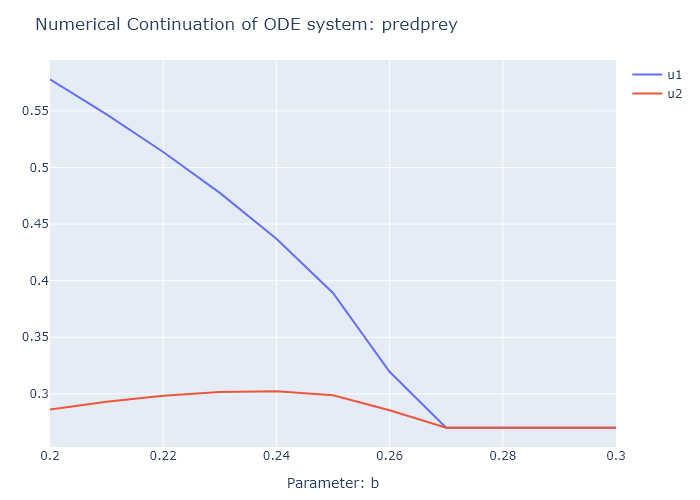

In [3]:
plot_continuation(predprey, [1 1], 6, "b", 0.2:0.01:0.3, method="npc")

Increasing the step size makes the plot higher resolution, at a moderate time expense. 

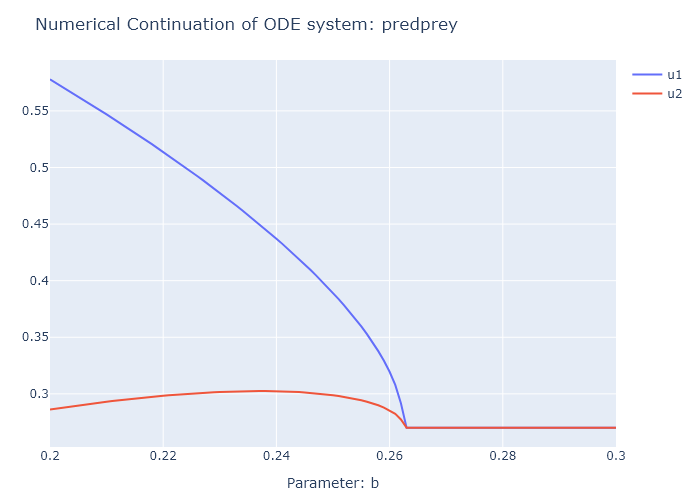

In [10]:
plot_continuation(predprey, [1 1], 6, "b", 0.2:0.001:0.3, method="npc")

Additionally, when using the function on other ODEs, some problems occur with the Natural Parameter Continuation method. Take, for example, the normal form of the Hopf bifurcation:

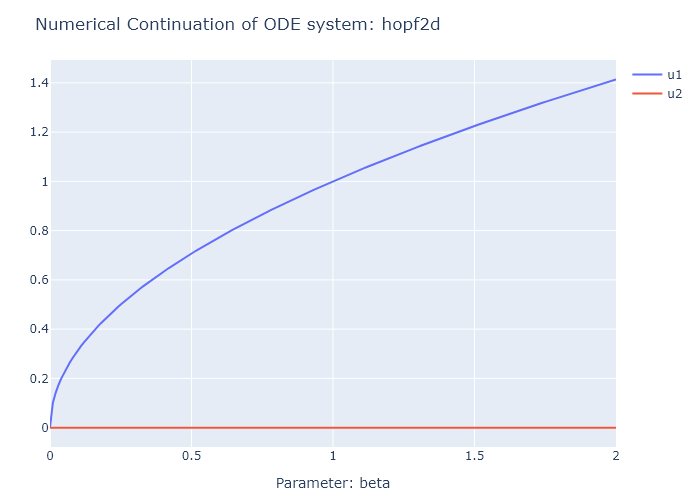

In [5]:
plot_continuation(hopf2d, [1 1], 6, "beta", 2:-0.01:0, method="npc")

Half of the plot is missing! To overcome this, we can employ the Pseudo Arclength method. Also, note that the direction of the par_values input argument has changed. Instead of ascending, the values are now decreasing. This is an important consideration to make when choosing values to test if meaningful output is desired, and will be explained further.

## Pseudo Arclength Example

Here's the same plot, combined with one of the same function using the pseudo arclength method instead:

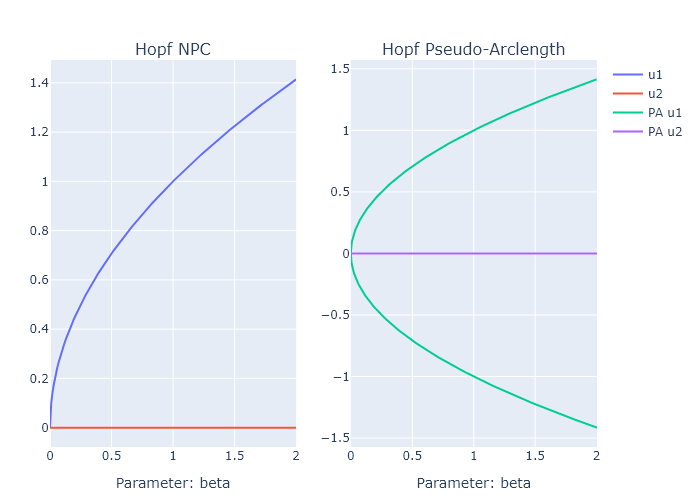

In [6]:
hopf_npc_plot = plot_continuation(
    hopf2d,
    [1 1],
    6,
    "beta",
    2:-0.01:0,
    method = "npc",
    title = "Hopf NPC",
)
hopf_pa_plot = plot_continuation(
    hopf2d,
    [1 1],
    6,
    "beta",
    2:-0.01:0,
    method = "pa",
    title = "Hopf Pseudo-Arclength",
    labels = ["PA u1", "PA u2"],
)

hopf_plot = [hopf_npc_plot hopf_pa_plot]
relayout!(hopf_plot)
hopf_plot

Note that it is possible to add titles to the plots by passing keyword arguments to the Plotly layout function inside of `plot_continuation`. We can make a second plot for the modified Hopf normal form, which is 4th order:

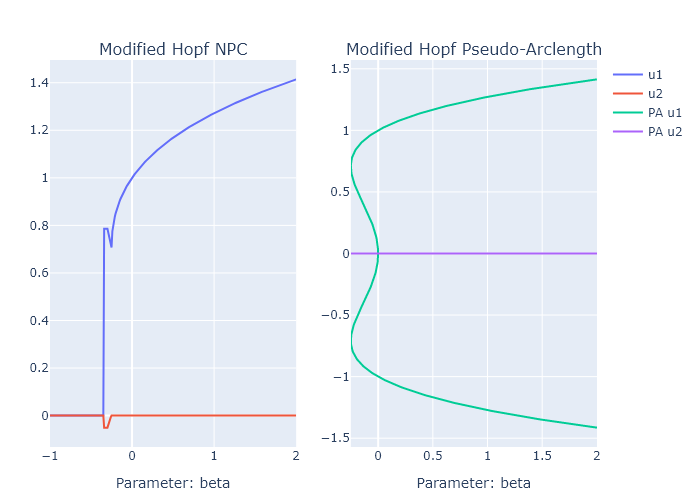

In [7]:
modified_hopf_npc_plot = plot_continuation(
    hopf2d_modified,
    [1 1],
    6,
    "beta",
    2:-0.01:-1,
    method = "npc",
    title = "Modified Hopf NPC",
)
modified_hopf_pa_plot = plot_continuation(
    hopf2d_modified,
    [1 1],
    6,
    "beta",
    2:-0.01:-1,
    method = "pa",
    title = "Modified Hopf Pseudo-Arclength",
    labels = ["PA u1", "PA u2"],
)

modified_hopf_plot = [modified_hopf_npc_plot modified_hopf_pa_plot]
relayout!(modified_hopf_plot, width=900, height=350)
modified_hopf_plot

One other note is that it's important in this case to choose a parameter range that is concious of the system's behaviour. For example, look what happens when we try to plot beta starting at 0 and going to 2, instead of the opposite as was used earlier:

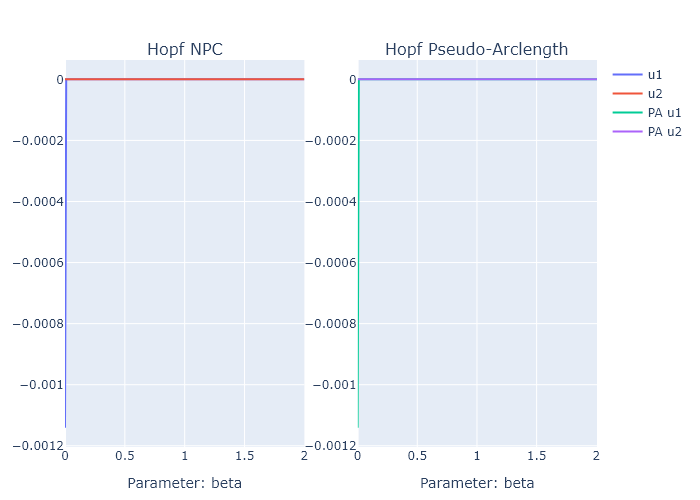

In [8]:
hopf_npc_plot = plot_continuation(
    hopf2d,
    [1 1],
    6,
    "beta",
    0:0.01:2,
    method = "npc",
    title = "Hopf NPC",
)
hopf_pa_plot = plot_continuation(
    hopf2d,
    [1 1],
    6,
    "beta",
    0:0.01:2,
    method = "pa",
    title = "Hopf Pseudo-Arclength",
    labels = ["PA u1", "PA u2"],
)

hopf_plot = [hopf_npc_plot hopf_pa_plot]
relayout!(hopf_plot)
hopf_plot

One final thing to note is that some functions require no discretisation, and will throw a somewhat unhelpful MethodError if you try and discretise them. For these functions, specify discretisation = "none".

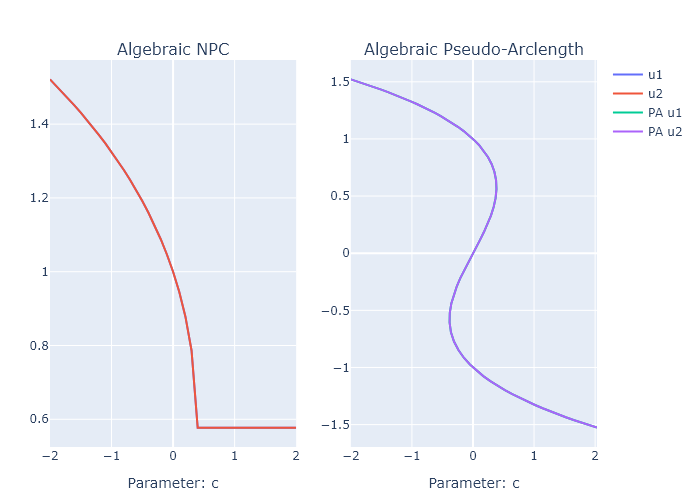

In [9]:
algebraic_npc_plot = plot_continuation(
    algebraic,
    [1],
    1,
    "c",
    -2:0.1:2,
    method = "npc",
    discretisation = "none",
    title = "Algebraic NPC",
)
algebraic_pa_plot = plot_continuation(
    algebraic,
    [1],
    1,
    "c",
    -2:0.1:2,
    method = "pa",
    discretisation = "none",
    title = "Algebraic Pseudo-Arclength",
    labels = ["PA u1", "PA u2"],
)

algebraic_plot = [algebraic_npc_plot algebraic_pa_plot]
relayout!(algebraic_plot)
algebraic_plot